In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

In [4]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

Text(0, 0.5, 'salary')

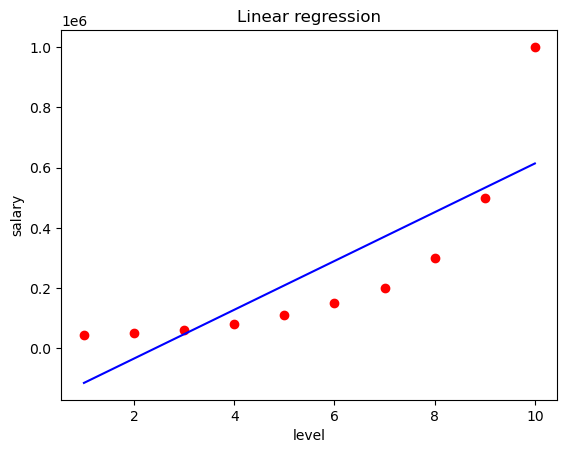

In [7]:
#visualizing the linear regression 
plt.scatter(x,y,color='red')
plt.plot(x,model.predict(x),color='blue')
plt.title('Linear regression')
plt.xlabel('level')
plt.ylabel('salary')


# As actual and predicted values has very large difference(residual)
## by observing actual plot the relation is not linear,hence polynomial regression can be used

In [8]:
#polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)
lin_poly=LinearRegression()
lin_poly.fit(x_poly,y)

LinearRegression()

Text(0, 0.5, 'salary')

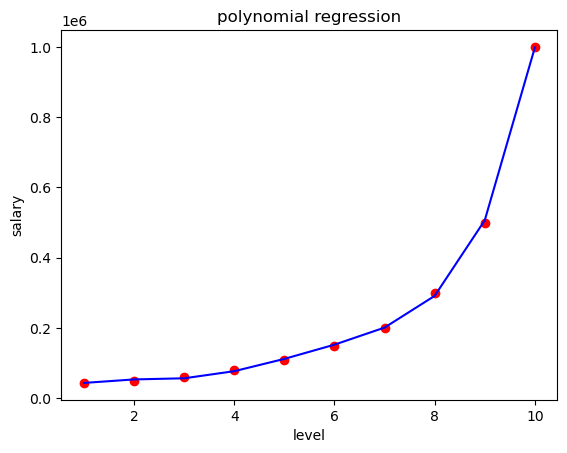

In [9]:
#visualizing the polynomial regression 
plt.scatter(x,y,color='red')
plt.plot(x,lin_poly.predict(x_poly),color='blue')
plt.title('polynomial regression')
plt.xlabel('level')
plt.ylabel('salary')

In [10]:
y_2d=y.reshape(len(y),1)
y_2d



array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [11]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [12]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(x) #scaled version of input and output
Y=sc_y.fit_transform(y_2d)


In [13]:
#training the SVR model
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
svr_reg.fit(X,Y)

C:\Users\MRUTHULA SARAS P S\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

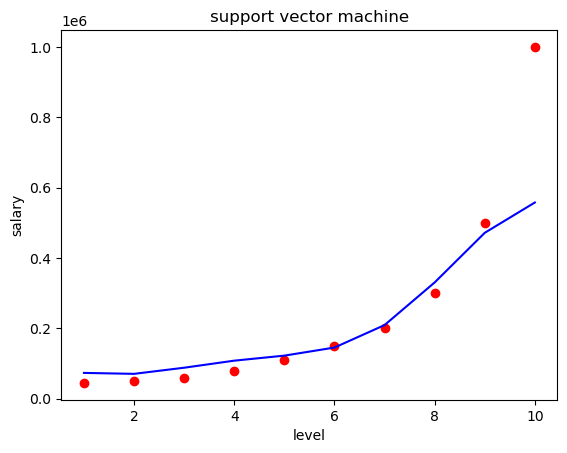

In [14]:
#visualizing SVR result
plt.scatter(x,y,color='red')
plt.plot(x, sc_y.inverse_transform(svr_reg.predict(X).reshape(-1,1)),color='blue')
plt.title('support vector machine')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()

In [15]:
svr_reg.predict(Y)

array([-0.53538395, -0.53170242, -0.52448288, -0.51073037, -0.49210854,
       -0.47091293, -0.44693354, -0.36473794,  0.30234549,  0.38557179])

# RANDOM FOREST IMPLEMENTATION

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=5,random_state=0)
rf_reg.fit(x,y)

RandomForestRegressor(n_estimators=5, random_state=0)

Text(0, 0.5, 'salary')

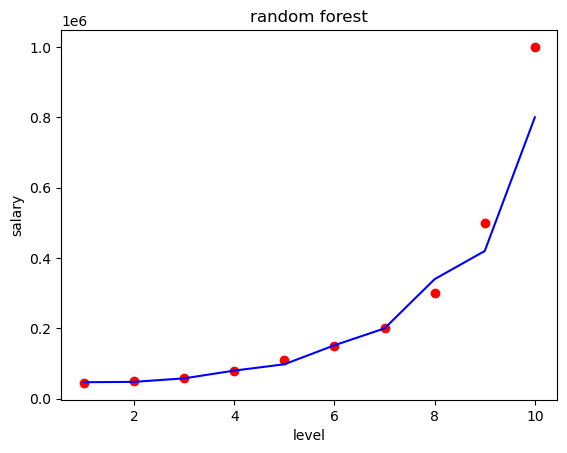

In [18]:
#visualizing Random forest regression
plt.scatter(x,y,color='red')
plt.plot(x,rf_reg.predict(x),color='blue')
plt.title('random forest')
plt.xlabel('level')
plt.ylabel('salary')